# Metabolic Syndrome prediction

To create this model we took the heart failure dataset from [Kaggle](https://www.kaggle.com/datasets/antimoni/metabolic-syndrome/data) with the following variables:

- seqn: Sequential identification number.
- Age: Age of the individual.
- Sex: Gender of the individual (e.g., Male, Female).
- Marital: Marital status of the individual.
- Income: Income level or income-related information.
- Race: Ethnic or racial background of the individual.
- WaistCirc: Waist circumference measurement.
- BMI: Body Mass Index, a measure of body composition.
- Albuminuria: Measurement related to albumin in urine.
- UrAlbCr: Urinary albumin-to-creatinine ratio.
- UricAcid: Uric acid levels in the blood.
- BloodGlucose: Blood glucose levels, an indicator of diabetes risk.
- HDL: High-Density Lipoprotein cholesterol levels (the "good" cholesterol).
- Triglycerides: Triglyceride levels in the blood.
- MetabolicSyndrome: Binary variable indicating the presence (1) or absence (0) of metabolic syndrome.

In [1]:
import pandas as pd
data = pd.read_csv("Metabolic Syndrome.csv")
data.head()

seqn  Age     Sex  Marital  Income   Race  WaistCirc   BMI  Albuminuria  \
0  62161   22    Male   Single  8200.0  White       81.0  23.3            0   
1  62164   44  Female  Married  4500.0  White       80.1  23.2            0   
2  62169   21    Male   Single   800.0  Asian       69.6  20.1            0   
3  62172   43  Female   Single  2000.0  Black      120.4  33.3            0   
4  62177   51    Male  Married     NaN  Asian       81.1  20.1            0   

   UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  MetabolicSyndrome  
0     3.88       4.9            92   41             84                  0  
1     8.55       4.5            82   28             56                  0  
2     5.07       5.4           107   43             78                  0  
3     5.22       5.0           104   73            141                  0  
4     8.13       5.0            95   43            126                  0

In [2]:
data.describe()

seqn          Age       Income    WaistCirc          BMI  \
count   2401.000000  2401.000000  2284.000000  2316.000000  2375.000000   
mean   67030.674302    48.691795  4005.253940    98.307254    28.702189   
std     2823.565114    17.632852  2954.032186    16.252634     6.662242   
min    62161.000000    20.000000   300.000000    56.200000    13.400000   
25%    64591.000000    34.000000  1600.000000    86.675000    24.000000   
50%    67059.000000    48.000000  2500.000000    97.000000    27.700000   
75%    69495.000000    63.000000  6200.000000   107.625000    32.100000   
max    71915.000000    80.000000  9000.000000   176.000000    68.700000   

       Albuminuria      UrAlbCr     UricAcid  BloodGlucose          HDL  \
count  2401.000000  2401.000000  2401.000000   2401.000000  2401.000000   
mean      0.154102    43.626131     5.489046    108.247813    53.369429   
std       0.422780   258.272829     1.439358     34.820657    15.185537   
min       0.000000     1.400000     1.800000     39.000000    14.000000   
25%       0.000000     4.450000     4.500000     92.000000    43.000000   
50%       0.000000     7.070000     5.400000     99.000000    51.000000   
75%       0.000000    13.690000     6.400000    110.000000    62.000000   
max       2.000000  5928.000000    11.300000    382.000000   156.000000   

       Triglycerides  MetabolicSyndrome  
count    2401.000000        2401.000000  
mean      128.125364           0.342357  
std        95.322477           0.474597  
min        26.000000           0.000000  
25%        75.000000           0.000000  
50%       103.000000           0.000000  
75%       150.000000           1.000000  
max      1562.000000           1.000000

In [3]:
#check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [4]:
#check porcentage of null values by column
(data.isnull().sum()/len(data))*100

seqn                 0.000000
Age                  0.000000
Sex                  0.000000
Marital              8.663057
Income               4.872970
Race                 0.000000
WaistCirc            3.540192
BMI                  1.082882
Albuminuria          0.000000
UrAlbCr              0.000000
UricAcid             0.000000
BloodGlucose         0.000000
HDL                  0.000000
Triglycerides        0.000000
MetabolicSyndrome    0.000000
dtype: float64

<AxesSubplot: xlabel='MetabolicSyndrome', ylabel='count'>

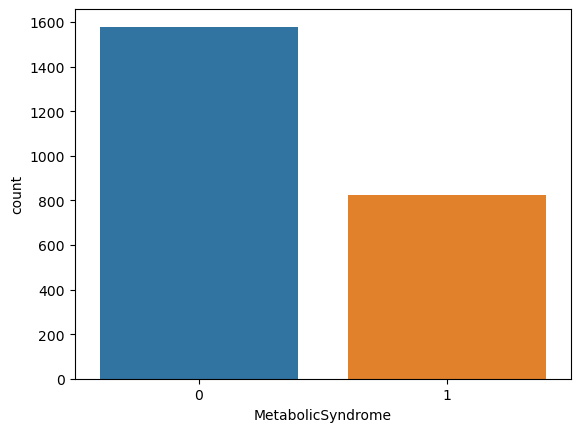

In [5]:
#check distribution of the target variable
import seaborn as sns
sns.countplot(x=data['MetabolicSyndrome'], label = "MetabolicSyndrome")

It is observed that there is an imbalance in the response variable, there are more observations of people who do not have the metabolic syndrome compared to those who have it.

# Correct null values

Considering that there are null values in some columns, we need to fix this before training the model. To do this, we are going to impute data. It depends on the column and the number of null values we have, we are going to implement different imputation techniques:

## For income column

In this case I will imput with the mean value according to the demographic characteristics like `Age`,`Sex`,`Marital` and `Race`

In [6]:
list(data['Income'].unique())

[8200.0,
 4500.0,
 800.0,
 2000.0,
 nan,
 300.0,
 9000.0,
 6200.0,
 1000.0,
 2500.0,
 3500.0,
 1500.0,
 1600.0,
 5400.0,
 1700.0]

In [7]:
inc_mean=data.groupby(['Age','Sex','Marital','Race'])['Income'].mean().reset_index()

In [8]:
inc_mean=pd.DataFrame(inc_mean)
inc_mean

Age     Sex  Marital         Race       Income
0      20  Female   Single        Asian  9000.000000
1      20  Female   Single        Black  1276.923077
2      20  Female   Single  MexAmerican  9000.000000
3      20  Female   Single        Other          NaN
4      20  Female   Single        White  2483.333333
...   ...     ...      ...          ...          ...
1065   80    Male   Single        White  2150.000000
1066   80    Male  Widowed        Asian   800.000000
1067   80    Male  Widowed        Black  3175.000000
1068   80    Male  Widowed  MexAmerican  9000.000000
1069   80    Male  Widowed        White  2833.333333

[1070 rows x 5 columns]

In [9]:
# Create a new df with the null values in income
missing_income = data[data['Income'].isnull()]
# Now we will merge the dataframes to fill null values according to mean
imputed_data = pd.merge(missing_income, inc_mean, on=['Age', 'Sex', 'Marital', 'Race'], how='left', suffixes=('', '_mean'))
imputed_data['Income'].fillna(imputed_data['Income_mean'], inplace=True)
#remove income_mean column
imputed_data.drop('Income_mean', axis=1, inplace=True)
#check null values again:
imputed_data

seqn  Age     Sex   Marital       Income         Race  WaistCirc   BMI  \
0    62177   51    Male   Married  4733.333333        Asian       81.1  20.1   
1    62286   30    Male    Single  1550.000000        Black      130.3  41.0   
2    62471   76  Female  Divorced          NaN        White      101.2  28.0   
3    62527   79    Male    Single          NaN        Black       95.0  25.8   
4    62528   40    Male       NaN          NaN     Hispanic       87.7  24.8   
..     ...  ...     ...       ...          ...          ...        ...   ...   
112  71702   70  Female   Widowed  3000.000000        Black       94.2  26.0   
113  71730   40  Female  Divorced          NaN     Hispanic       87.1  25.4   
114  71785   64    Male  Divorced  2000.000000        Black      102.1  28.4   
115  71866   32    Male  Divorced          NaN  MexAmerican       89.3  27.3   
116  71877   72    Male   Married  3900.000000     Hispanic      101.6  25.4   

     Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  \
0              0     8.13       5.0            95   43            126   
1              0     9.39       7.5           108   29            194   
2              0     8.72       2.6            95   51             62   
3              0     9.04       7.4           128   54             62   
4              0     3.29       5.7           101   43            207   
..           ...      ...       ...           ...  ...            ...   
112            1    34.41       6.4           126   93             59   
113            0     6.02       3.4            87   53            107   
114            0     6.06       6.0           100   43             70   
115            0     7.76       5.8            98   53             86   
116            1    71.84       6.0           135   39            105   

     MetabolicSyndrome  
0                    0  
1                    1  
2                    0  
3                    0  
4                    0  
..                 ...  
112                  1  
113                  0  
114                  1  
115                  0  
116                  1  

[117 rows x 15 columns]

In [10]:
#As we still have null values, we will imput with the mean
mean_income = data['Income'].mean()
imputed_data['Income'].fillna(mean_income, inplace=True)
imputed_data

seqn  Age     Sex   Marital       Income         Race  WaistCirc   BMI  \
0    62177   51    Male   Married  4733.333333        Asian       81.1  20.1   
1    62286   30    Male    Single  1550.000000        Black      130.3  41.0   
2    62471   76  Female  Divorced  4005.253940        White      101.2  28.0   
3    62527   79    Male    Single  4005.253940        Black       95.0  25.8   
4    62528   40    Male       NaN  4005.253940     Hispanic       87.7  24.8   
..     ...  ...     ...       ...          ...          ...        ...   ...   
112  71702   70  Female   Widowed  3000.000000        Black       94.2  26.0   
113  71730   40  Female  Divorced  4005.253940     Hispanic       87.1  25.4   
114  71785   64    Male  Divorced  2000.000000        Black      102.1  28.4   
115  71866   32    Male  Divorced  4005.253940  MexAmerican       89.3  27.3   
116  71877   72    Male   Married  3900.000000     Hispanic      101.6  25.4   

     Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  \
0              0     8.13       5.0            95   43            126   
1              0     9.39       7.5           108   29            194   
2              0     8.72       2.6            95   51             62   
3              0     9.04       7.4           128   54             62   
4              0     3.29       5.7           101   43            207   
..           ...      ...       ...           ...  ...            ...   
112            1    34.41       6.4           126   93             59   
113            0     6.02       3.4            87   53            107   
114            0     6.06       6.0           100   43             70   
115            0     7.76       5.8            98   53             86   
116            1    71.84       6.0           135   39            105   

     MetabolicSyndrome  
0                    0  
1                    1  
2                    0  
3                    0  
4                    0  
..                 ...  
112                  1  
113                  0  
114                  1  
115                  0  
116                  1  

[117 rows x 15 columns]

In [11]:
# Now we will merge both dataframes
data_full = pd.concat([data.dropna(subset=['Income']), imputed_data])

In [12]:
#check null values again: 
data_full.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income                 0
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

## For BMI and WaistCirc columns

For this column we will imput with the mean 

In [13]:
mean_BMI = data_full['BMI'].mean()
data_full['BMI']=data_full['BMI'].fillna(mean_BMI)
#Check null values again
data_full.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income                 0
Race                   0
WaistCirc             85
BMI                    0
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [14]:
mean_WaistCirc = data_full['WaistCirc'].mean()
data_full['WaistCirc']=data_full['WaistCirc'].fillna(mean_WaistCirc)
#Check null values again
data_full.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income                 0
Race                   0
WaistCirc              0
BMI                    0
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

## Marital

For this column we will use a model to imput with the most frequent value

In [15]:
missing_marital = data_full[data_full['Marital'].isnull()]
missing_marital

seqn  Age     Sex Marital      Income         Race  WaistCirc   BMI  \
9    62195   35    Male     NaN  2500.00000        Black       99.0  28.2   
10   62199   57    Male     NaN  9000.00000        White      107.8  28.0   
24   62239   22  Female     NaN   300.00000     Hispanic       78.9  23.3   
42   62332   22    Male     NaN  1600.00000        White      110.7  32.6   
64   62413   65    Male     NaN  2000.00000        White      127.5  40.0   
..     ...  ...     ...     ...         ...          ...        ...   ...   
85   69702   42    Male     NaN  4005.25394        White       97.0  26.9   
86   69770   24  Female     NaN  4005.25394        Black       75.5  22.1   
89   69864   52    Male     NaN  4005.25394        Black       92.8  28.7   
97   70534   48  Female     NaN  4005.25394  MexAmerican       95.3  27.6   
105  71213   38  Female     NaN  4005.25394        White       80.6  20.8   

     Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  \
9              0     2.21       6.7            94   46             86   
10             0     4.16       6.0           100   35             98   
24             0     5.33       4.1            90   42             68   
42             0     8.83       8.0           112   43            178   
64             0     8.73       9.3            70   63            169   
..           ...      ...       ...           ...  ...            ...   
85             0     6.23       6.3            99   39            208   
86             0     8.69       4.7            89   36             52   
89             0     7.79       6.9           105   62            106   
97             0     6.18       4.4           107   53            106   
105            0    12.34       5.4            93   47            125   

     MetabolicSyndrome  
9                    0  
10                   1  
24                   0  
42                   1  
64                   1  
..                 ...  
85                   0  
86                   0  
89                   0  
97                   0  
105                  0  

[208 rows x 15 columns]

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data_full['Marital'] = imputer.fit_transform(data_full[['Marital']])

In [17]:
#check null values again 
data_full.isnull().sum()

seqn                 0
Age                  0
Sex                  0
Marital              0
Income               0
Race                 0
WaistCirc            0
BMI                  0
Albuminuria          0
UrAlbCr              0
UricAcid             0
BloodGlucose         0
HDL                  0
Triglycerides        0
MetabolicSyndrome    0
dtype: int64

# EDA and visualization

C:\Users\57301\AppData\Local\Temp\ipykernel_14116\1565354205.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data_full.corr()


<AxesSubplot: >

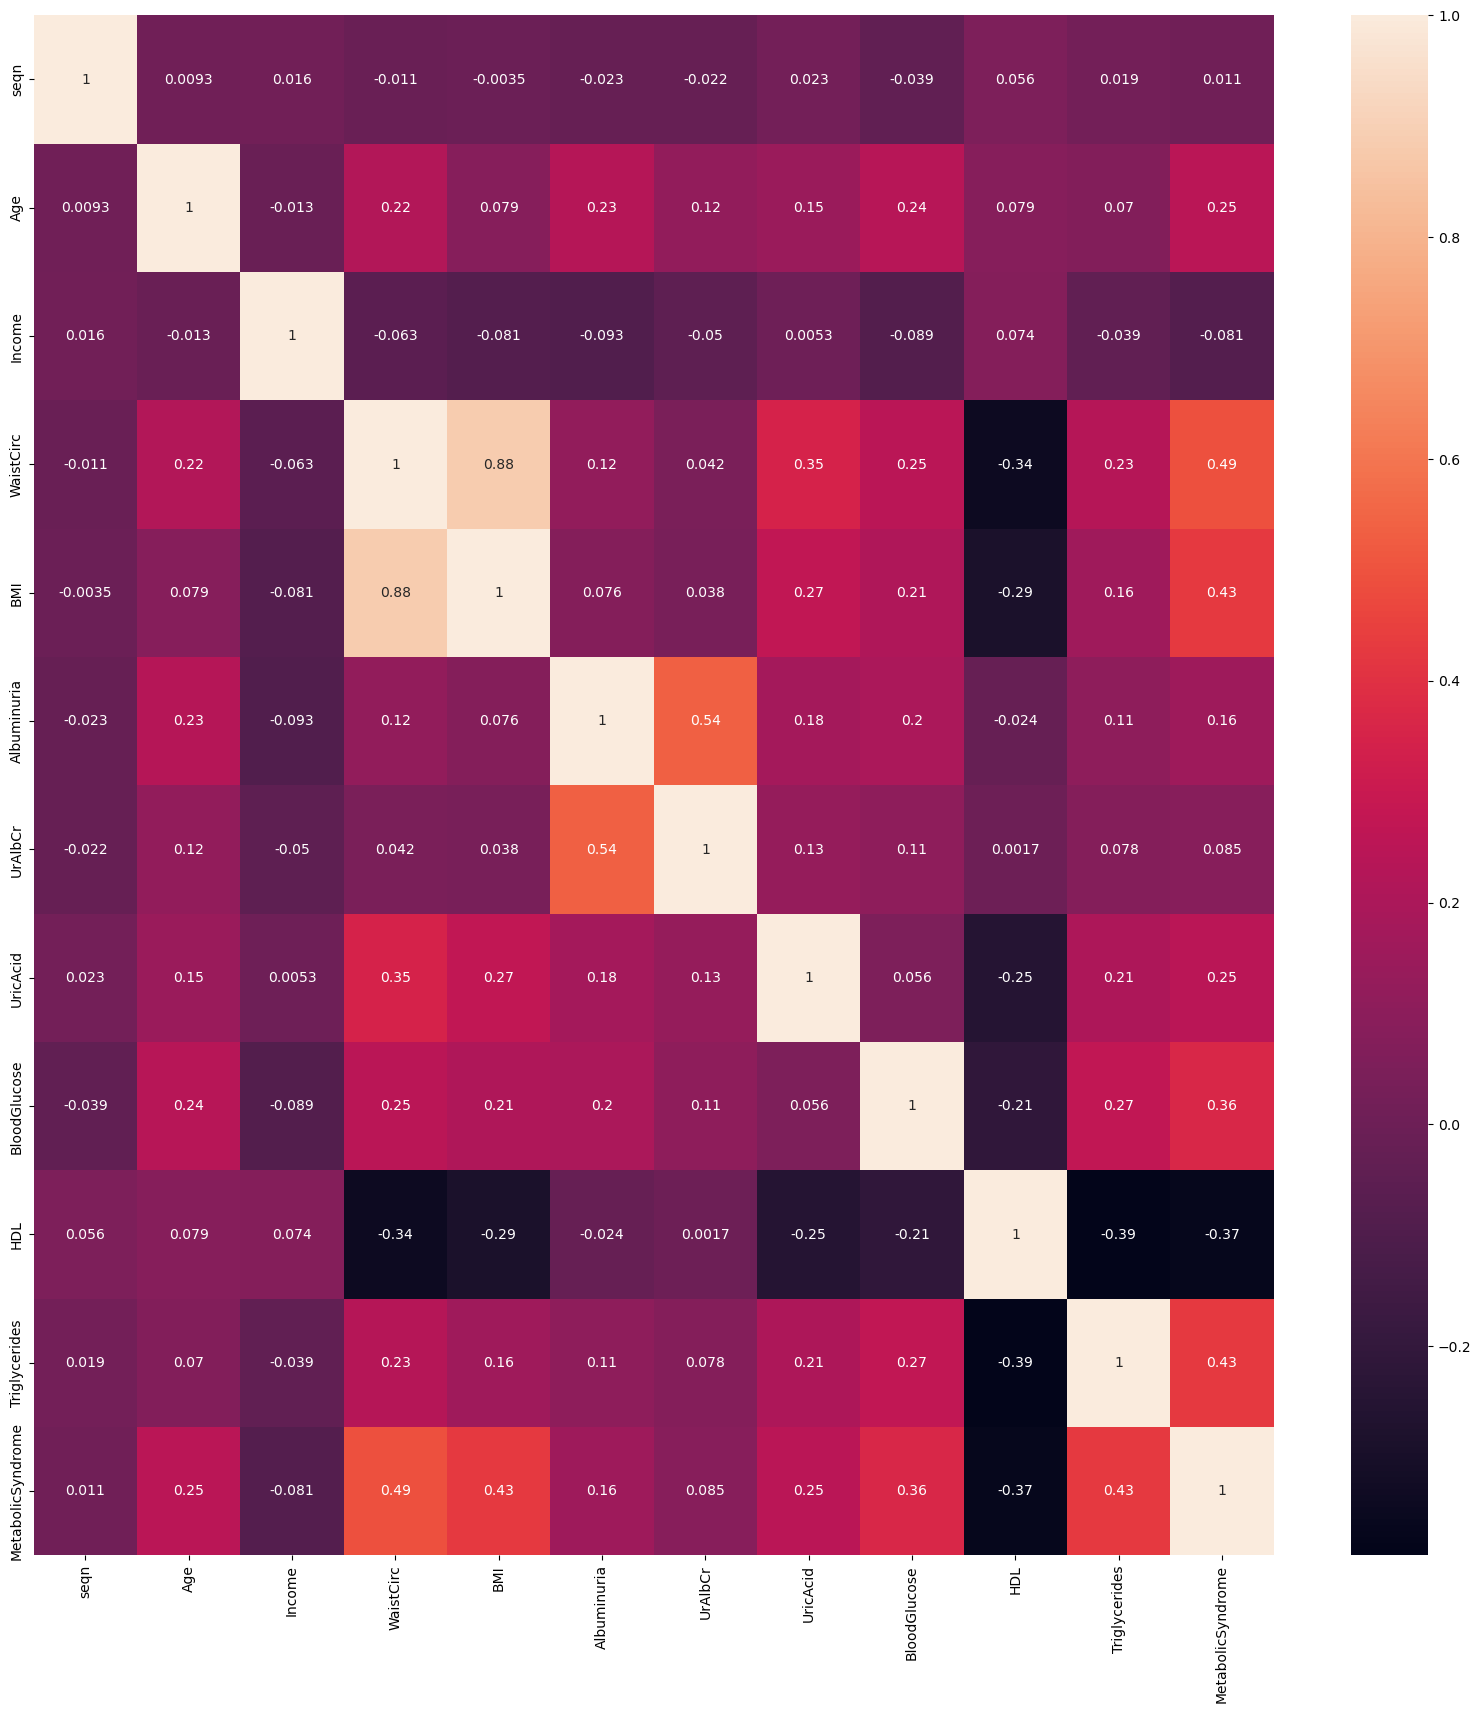

In [18]:
import matplotlib.pyplot as plt
correlations = data_full.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In the correlation matrix it is observed that the variables `WaistCirc`, `BMI`, and `Triglycerides` have an important correlation with the dependent variable, which means that these are variables of utmost importance for our model.

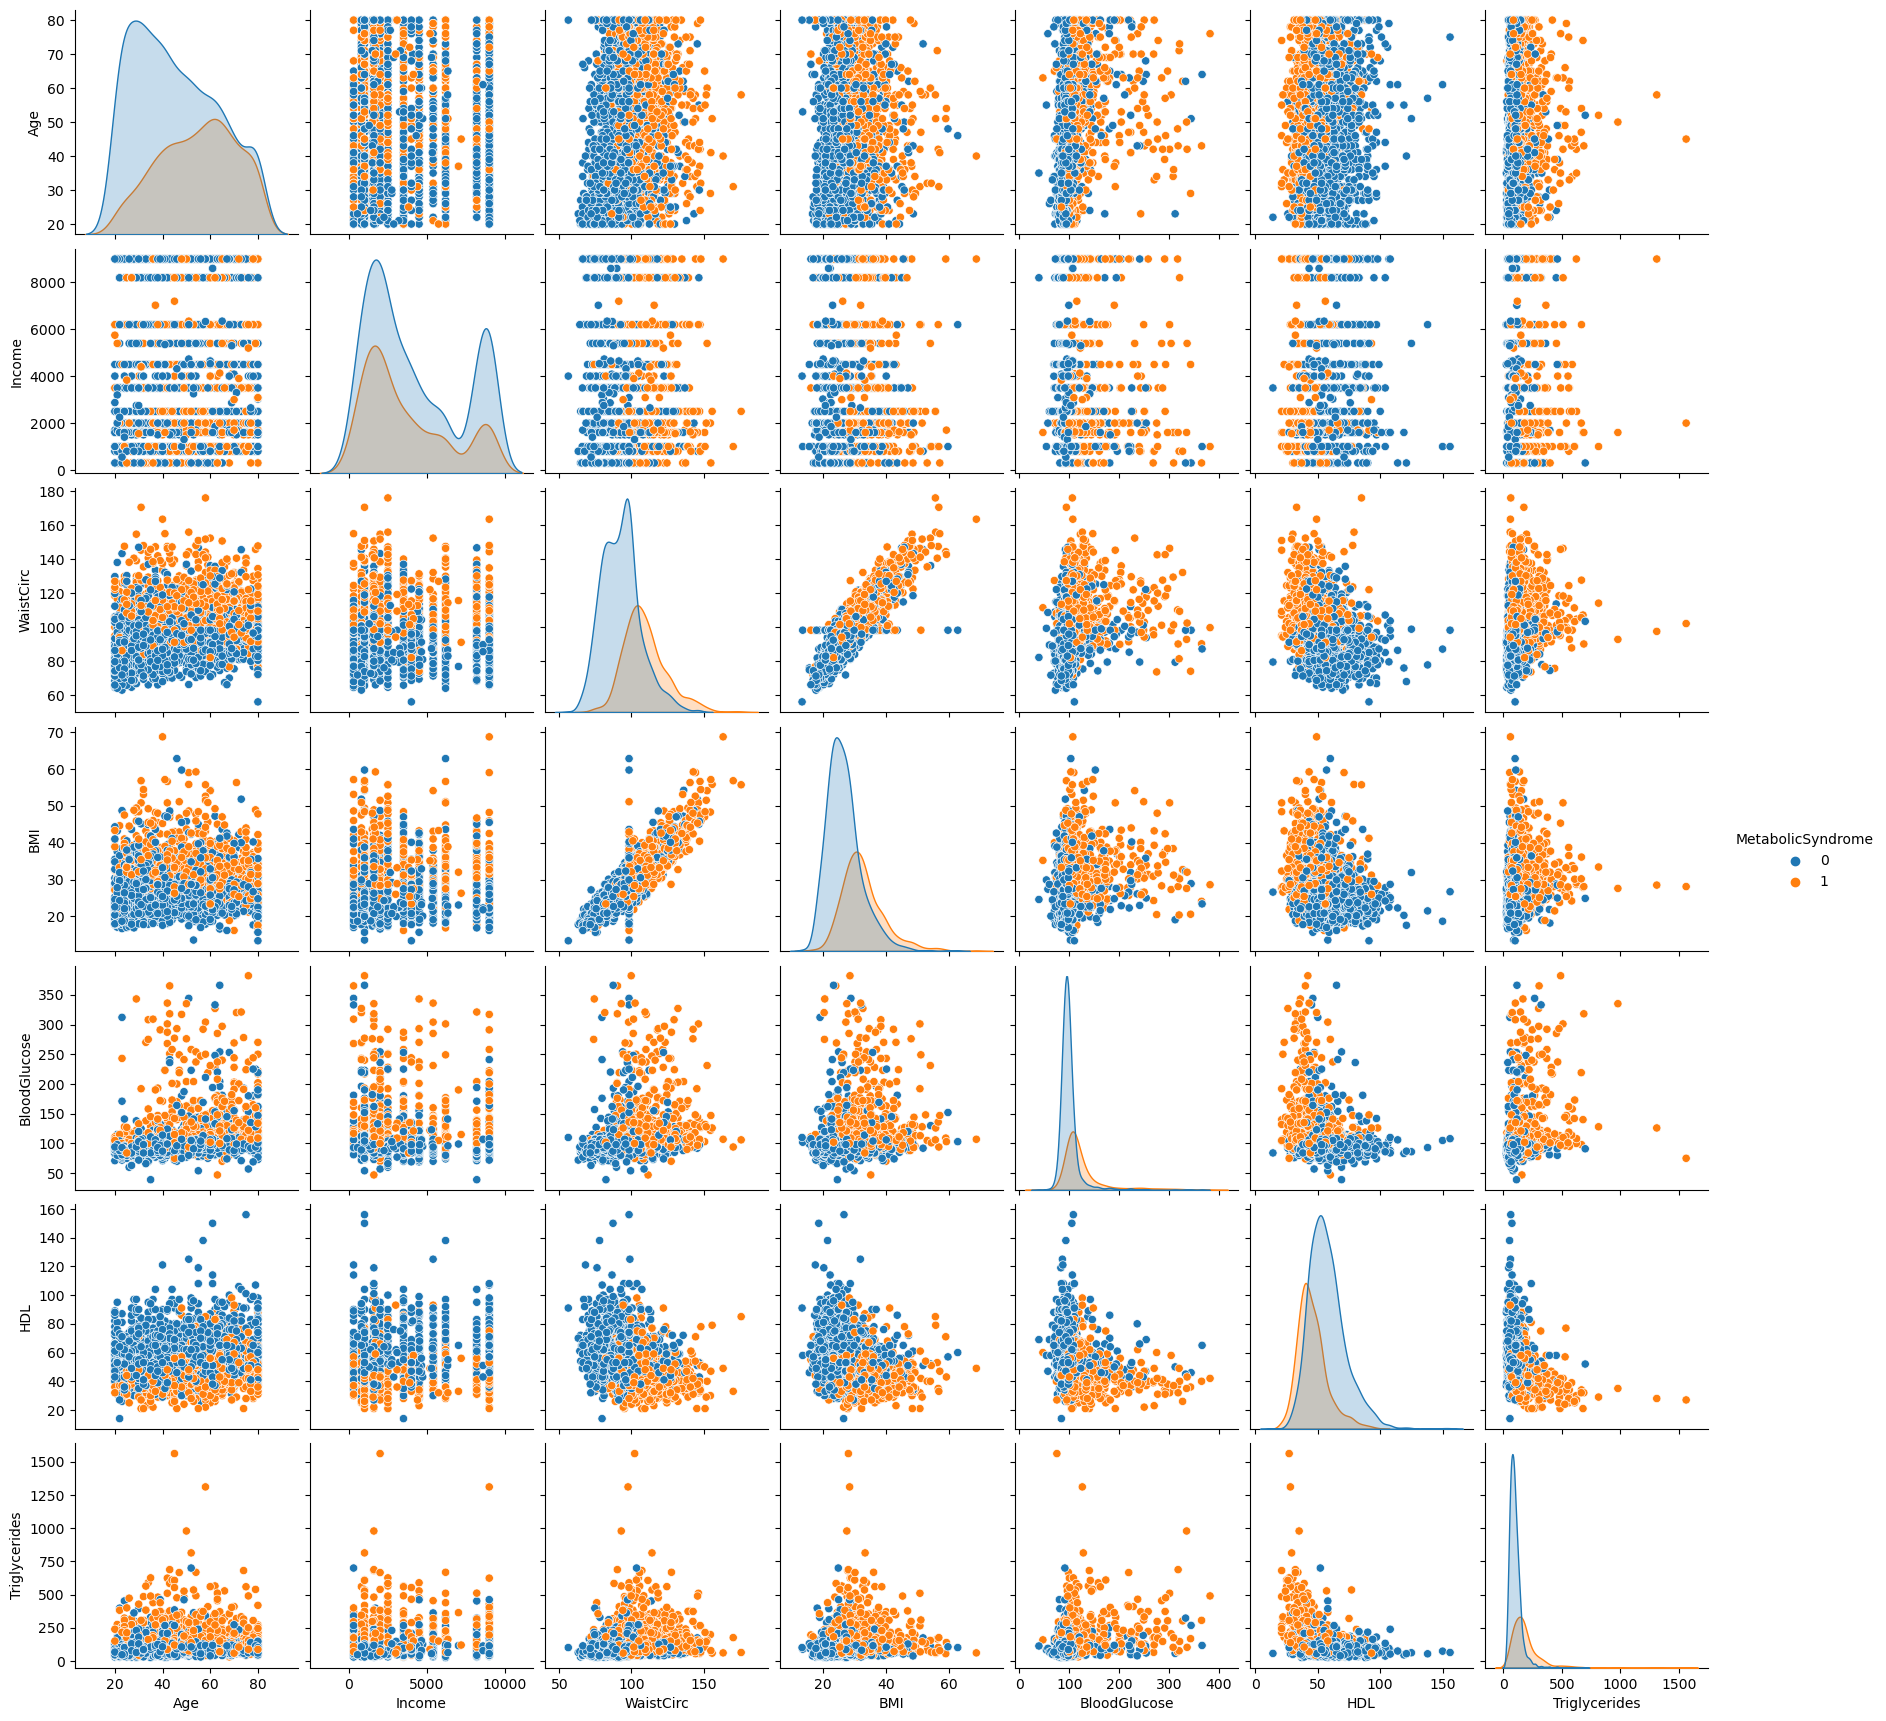

In [19]:
sns.pairplot(data_full, hue = 'MetabolicSyndrome' , vars = ['Age', 'Income','WaistCirc','BMI','BloodGlucose','HDL','Triglycerides'] )

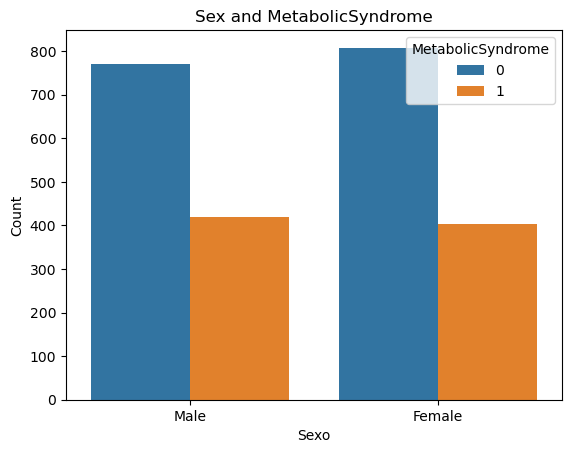

In [20]:
import matplotlib.pyplot as plt
sns.countplot(data=data_full, x="Sex", hue="MetabolicSyndrome")
plt.title("Sex and MetabolicSyndrome")
plt.xlabel("Sexo")
plt.ylabel("Count")
plt.legend(title="MetabolicSyndrome")
plt.show()

In our data it is observed that there is an equal proportion of men and women who suffer from metabolic syndrome and who do not.

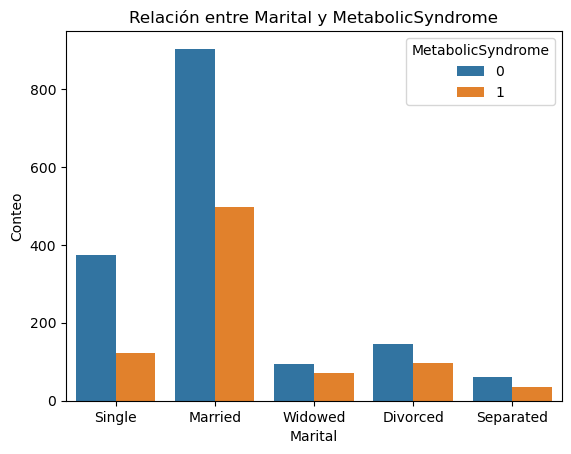

In [21]:
import matplotlib.pyplot as plt
sns.countplot(data=data_full, x="Marital", hue="MetabolicSyndrome")
plt.title("Relación entre Marital y MetabolicSyndrome")
plt.xlabel("Marital")
plt.ylabel("Conteo")
plt.legend(title="MetabolicSyndrome")
plt.show()

When analyzing the marital variable, we observed that the highest proportion of patients who present metabolic syndrome are married, followed by single people.

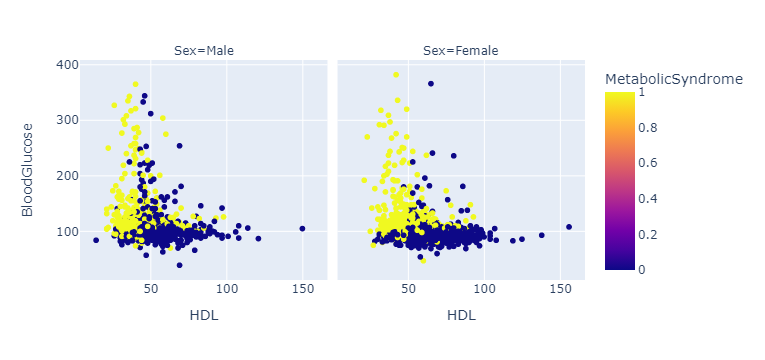

In [22]:
import plotly.express as px
fig = px.scatter(data_full, x="HDL", y="BloodGlucose", color="MetabolicSyndrome", facet_col="Sex")
fig.show()

It is observed that patients who have metabolic syndrome have higher blood glucose levels and lower HDL.

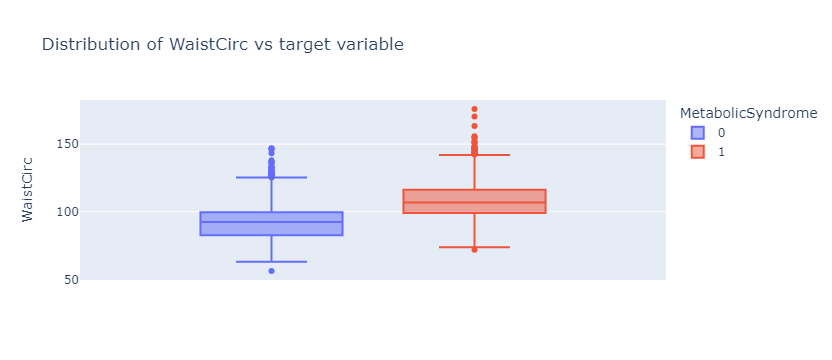

In [23]:
import plotly.express as px
fig = px.box(data_full, y="WaistCirc", color="MetabolicSyndrome",title = 'Distribution of WaistCirc vs target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

Users who suffer from metabolic syndrome had a higher Waist circumference measurement compared to users who do not suffer from it.

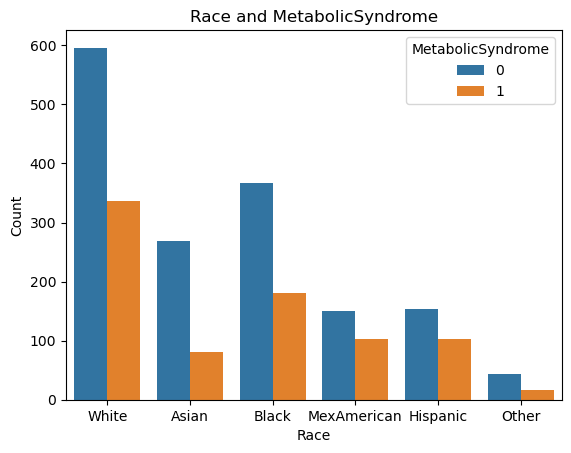

In [24]:
import matplotlib.pyplot as plt
sns.countplot(data=data_full, x="Race", hue="MetabolicSyndrome")
plt.title("Race and MetabolicSyndrome")
plt.xlabel("Race")
plt.ylabel("Count")
plt.legend(title="MetabolicSyndrome")
plt.show()

For the most part, it is observed that white and black patients suffer the most from metabolic syndrome.

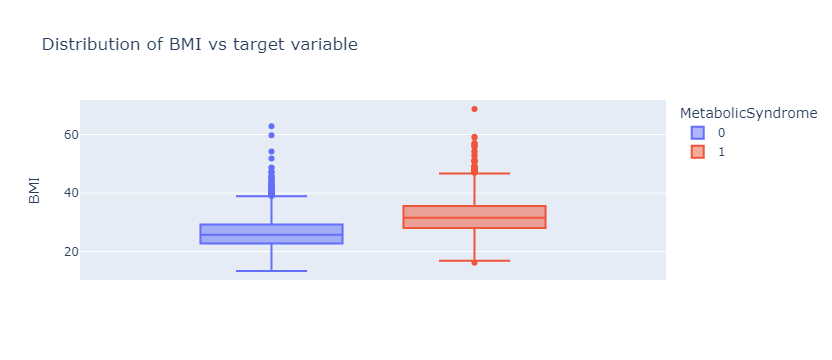

In [25]:
import plotly.express as px
fig = px.box(data_full, y="BMI", color="MetabolicSyndrome",title = 'Distribution of BMI vs target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

A notable difference is observed in the BMI variable between patients who have metabolic syndrome and those who do not, since those who suffer from it have a higher BMI compared to those who do not suffer from it.

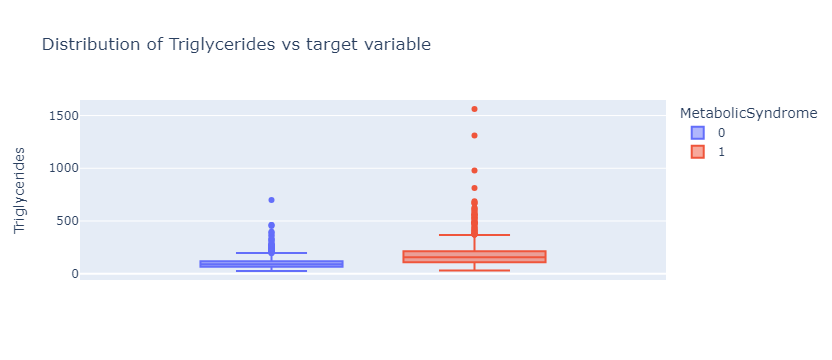

In [26]:
import plotly.express as px
fig = px.box(data_full, y="Triglycerides", color="MetabolicSyndrome",title = 'Distribution of Triglycerides vs target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

It is observed that the average triglyceride levels are higher in patients who presented metabolic syndrome, while patients without metabolic syndrome have lower triglyceride levels.

# Prep data for modeling

In [27]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2401 entries, 0 to 116
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2401 non-null   object 
 4   Income             2401 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2401 non-null   float64
 7   BMI                2401 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 300.1+ KB


In [28]:
data_full.drop('seqn',axis=1,inplace=True)

## Object data type and scale to train set

In [29]:
from sklearn.model_selection import train_test_split 
X = data_full.drop(columns="MetabolicSyndrome",axis=1)
y = data_full["MetabolicSyndrome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99,stratify=y)
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1920, 13)

(481, 13)

(1920,)

(481,)

In [30]:
X_train_cat = X_train.select_dtypes("O")
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 76 to 21
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Sex      1920 non-null   object
 1   Marital  1920 non-null   object
 2   Race     1920 non-null   object
dtypes: object(3)
memory usage: 60.0+ KB


In [31]:
#Let's encode categorical variables
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib
ohe = OneHotEncoder(sparse_output=False)
cat_data_ohe = ohe.fit_transform(X_train_cat)
cat_data_ohe = pd.DataFrame(cat_data_ohe, columns=ohe.get_feature_names_out())
cat_data_ohe.head()
joblib.dump(ohe,'ohe.pkl')

['ohe.pkl']

In [32]:
#Let's merge both data
X_train_full = pd.concat([X_train.reset_index(drop=True), cat_data_ohe], axis=1)
X_train_full = X_train_full.drop(columns=X_train_cat.columns)
X_train_full.head()

Age  Income  WaistCirc   BMI  Albuminuria  UrAlbCr  UricAcid  BloodGlucose  \
0   70  4500.0      104.7  27.2            1    46.50       8.6            88   
1   25   800.0      127.0  38.0            0     4.02       8.5            94   
2   22  3500.0       79.6  26.6            0    11.37       2.7            84   
3   39  5400.0       93.5  32.3            0     3.73       5.3            91   
4   32  2000.0       94.3  27.7            0     5.74       4.6            98   

   HDL  Triglycerides  ...  Marital_Married  Marital_Separated  \
0   47            273  ...              0.0                0.0   
1   42             77  ...              0.0                0.0   
2   14             57  ...              0.0                0.0   
3   57             83  ...              1.0                0.0   
4   40            122  ...              1.0                0.0   

   Marital_Single  Marital_Widowed  Race_Asian  Race_Black  Race_Hispanic  \
0             0.0              0.0         0.0         0.0            0.0   
1             1.0              0.0         0.0         1.0            0.0   
2             1.0              0.0         0.0         1.0            0.0   
3             0.0              0.0         0.0         0.0            1.0   
4             0.0              0.0         0.0         0.0            0.0   

   Race_MexAmerican  Race_Other  Race_White  
0               0.0         0.0         1.0  
1               0.0         0.0         0.0  
2               0.0         0.0         0.0  
3               0.0         0.0         0.0  
4               0.0         0.0         1.0  

[5 rows x 23 columns]

In [33]:
#Now I will scale my data
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
#now i also need to save my scaler
import pickle
with open ('scaler.pkl','wb') as s:
    pickle.dump(scaler,s)

## Object data type and scale to the test 

In [34]:
X_test_cat = X_test.select_dtypes(["O"])
# apply OHE to categorical columns
test_data_ohe = ohe.transform(X_test_cat)
test_data_ohe = pd.DataFrame(test_data_ohe, columns=ohe.get_feature_names_out())
# join OHEed columns to the original X matrix
X_test_full = pd.concat([X_test.reset_index(drop=True), test_data_ohe], axis=1)
X_test_full = X_test_full.drop(columns=X_test_cat.columns)
X_test_full.head()

Age  Income  WaistCirc   BMI  Albuminuria  UrAlbCr  UricAcid  BloodGlucose  \
0   23   300.0       81.2  21.9            0    11.11       5.2            92   
1   69  4100.0       97.0  23.9            2   572.46       6.2           111   
2   60  5400.0       87.0  22.1            1   100.57       9.5           105   
3   39  8200.0      123.5  33.8            0     4.76       9.2           122   
4   73  8200.0      109.4  30.2            1    83.90       4.4           321   

   HDL  Triglycerides  ...  Marital_Married  Marital_Separated  \
0   61            101  ...              0.0                0.0   
1   39            130  ...              1.0                0.0   
2   73            180  ...              1.0                0.0   
3   46            166  ...              1.0                0.0   
4   40            147  ...              0.0                0.0   

   Marital_Single  Marital_Widowed  Race_Asian  Race_Black  Race_Hispanic  \
0             1.0              0.0         0.0         0.0            0.0   
1             0.0              0.0         1.0         0.0            0.0   
2             0.0              0.0         0.0         1.0            0.0   
3             0.0              0.0         0.0         0.0            0.0   
4             0.0              1.0         0.0         1.0            0.0   

   Race_MexAmerican  Race_Other  Race_White  
0               1.0         0.0         0.0  
1               0.0         0.0         0.0  
2               0.0         0.0         0.0  
3               0.0         0.0         1.0  
4               0.0         0.0         0.0  

[5 rows x 23 columns]

In [35]:
# apply stanrdadization also to the test
X_test_full = scaler.transform(X_test_full)
X_test_full

array([[-1.45458796e+00, -1.27002035e+00, -1.06205747e+00, ...,
         2.94906251e+00, -1.63517485e-01, -7.82362244e-01],
       [ 1.17017879e+00,  1.86949813e-02, -8.09173231e-02, ...,
        -3.39090811e-01, -1.63517485e-01, -7.82362244e-01],
       [ 6.56637470e-01,  4.59571279e-01, -7.01892097e-01, ...,
        -3.39090811e-01, -1.63517485e-01, -7.82362244e-01],
       ...,
       [-5.41625612e-01,  1.68045949e+00,  2.59845500e-04, ...,
        -3.39090811e-01, -1.63517485e-01, -7.82362244e-01],
       [ 8.27817910e-01,  1.40915100e+00,  1.24796869e+00, ...,
        -3.39090811e-01, -1.63517485e-01,  1.27818029e+00],
       [ 3.71336736e-01,  1.68045949e+00, -5.52858151e-01, ...,
        -3.39090811e-01, -1.63517485e-01,  1.27818029e+00]])

# Model

In this case we are going to make an SVM model and we will indicate the hyperparameter `class_weight="balanced"` to indicate that our response variable is unbalanced and also with `probability=True` we will indicate that we want to obtain the probabilities

In [36]:
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
svm = SVC(class_weight="balanced",probability=True)

In [37]:
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

random_search_svm = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_grid,
    n_iter=5,  
    scoring="roc_auc",  
    n_jobs=7,
    return_train_score=True
)
random_search_svm.fit(X_train_full, y_train)

RandomizedSearchCV(estimator=SVC(class_weight='balanced', probability=True),
                   n_iter=5, n_jobs=7,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   return_train_score=True, scoring='roc_auc')

In [38]:
print(random_search_svm.best_params_)

{'kernel': 'linear', 'gamma': 0.001, 'C': 0.1}


# Model evaluation

We are going to evaluate the model taking into account the training and test data to verify that our model is not overfitting.

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, auc, roc_auc_score
import plotly.graph_objects as go

In [40]:
#first evaluate on train
proba_train = random_search_svm.predict_proba(X_train_full)
pred_train = random_search_svm.predict(X_train_full)

<AxesSubplot: >

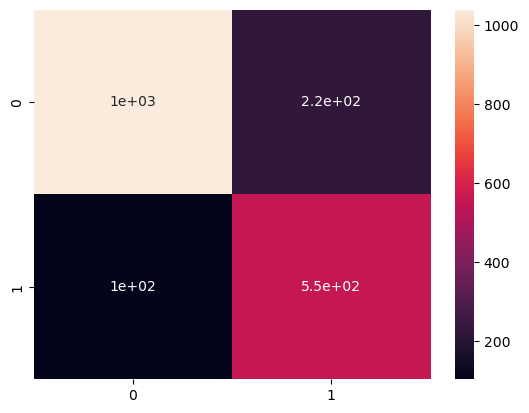

In [41]:
cm_train = confusion_matrix(y_train, pred_train)
sns.heatmap(cm_train, annot=True)

In [42]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1263
           1       0.71      0.84      0.77       657

    accuracy                           0.83      1920
   macro avg       0.81      0.83      0.82      1920
weighted avg       0.84      0.83      0.83      1920



In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_train_prob = proba_train[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)

auc = roc_auc_score(y_train, y_train_prob)
auc

0.9168049545005911

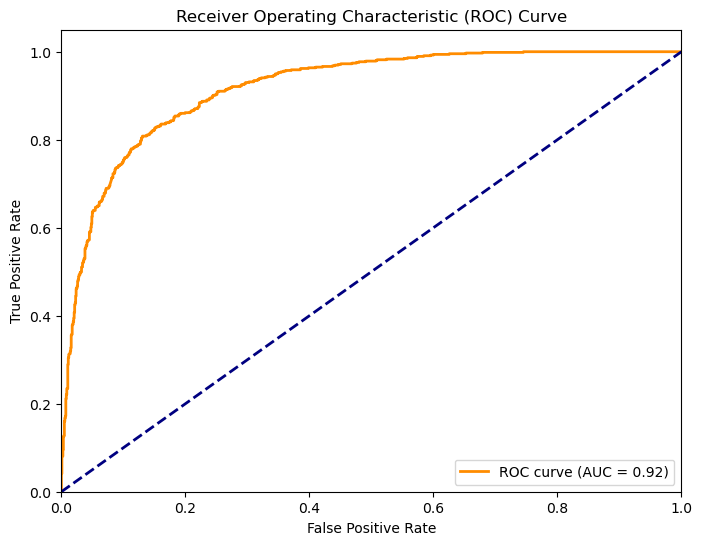

In [44]:
# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Model evaluation for test

<AxesSubplot: >

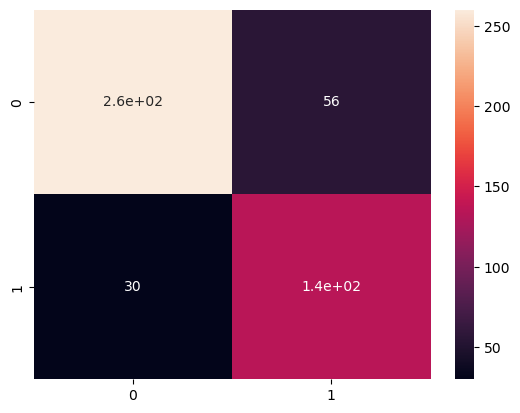

In [45]:
proba_test = random_search_svm.predict_proba(X_test_full)
pred_test = random_search_svm.predict(X_test_full)
cm_test = confusion_matrix(y_test, pred_test)
sns.heatmap(cm_test, annot=True)

In [46]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       316
           1       0.71      0.82      0.76       165

    accuracy                           0.82       481
   macro avg       0.80      0.82      0.81       481
weighted avg       0.83      0.82      0.82       481



In [47]:
y_test_prob = proba_test[:, 1]

# ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

# AUC
auc_test = roc_auc_score(y_test, y_test_prob)
auc_test

0.9000767165324127

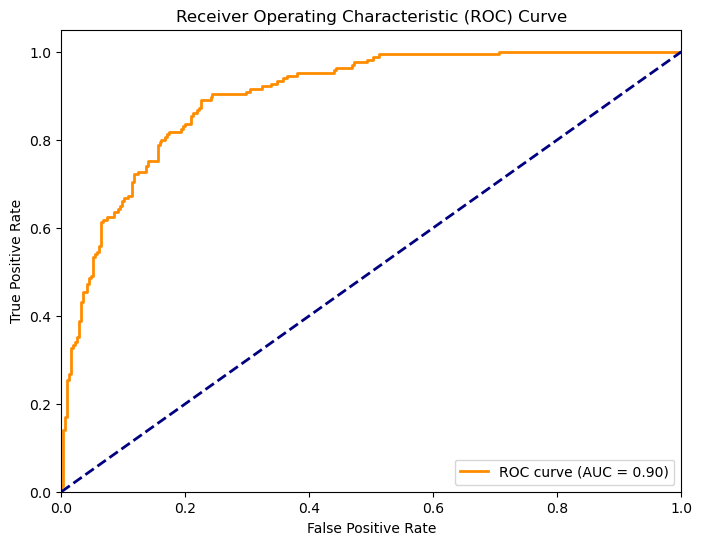

In [48]:
# ROC TEST
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [49]:
import pickle
with open ("MetabolicSyndrome_model.pkl", "wb") as m:
    pickle.dump(random_search_svm, m)